Cluster similar Houses
---------------------------------

Again, on the same dataset. Cluster similar houses together. Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt

- Data cleaning & getting rid of irrelevant information before clustering
- Finding the optimal value of k
- Storing cluster to which the house belongs along with the data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
#print("Hello World")

In [2]:
rent_df= pd.read_csv('E:/Namit/Namit/Training/Edyoda/MachineLearning/Assignments/house_rental_data.csv')

In [3]:
rent_df.head(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
mms = MinMaxScaler()
rent_df[['Sqft_scal','Floor_scal']] = mms.fit_transform(rent_df[['Sqft', 'Floor']])

In [5]:
rent_df.head(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Sqft_scal,Floor_scal
0,1,1177.698,2,7,2,2,2,62000,0.148867,0.047619
1,2,2134.800,5,7,4,2,2,78000,0.322977,0.190476
2,3,1138.560,5,7,2,2,1,58000,0.141748,0.190476
3,4,1458.780,2,7,3,2,2,45000,0.200000,0.047619
4,5,967.776,11,14,3,2,2,45000,0.110680,0.476190


In [6]:
# Optimum number of clusters using elbow method -

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

In [7]:
# Making a separate array file 

array1 = rent_df['Sqft_scal'].to_numpy()
array2 = rent_df['Floor_scal'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(array)
    kmeanModel.fit(array)

    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\NAMIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\NAMIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1 : 0.19235486945699923
2 : 0.14855669445894706
3 : 0.12714816424111544
4 : 0.11334917105795632
5 : 0.09910827637507942
6 : 0.09195027213711217
7 : 0.08441016821057795
8 : 0.07787183727154857
9 : 0.07698927738657006
10 : 0.07083499302337833
11 : 0.06748860981370233
12 : 0.06317386298956668
13 : 0.06138142330333889
14 : 0.05959743418713565


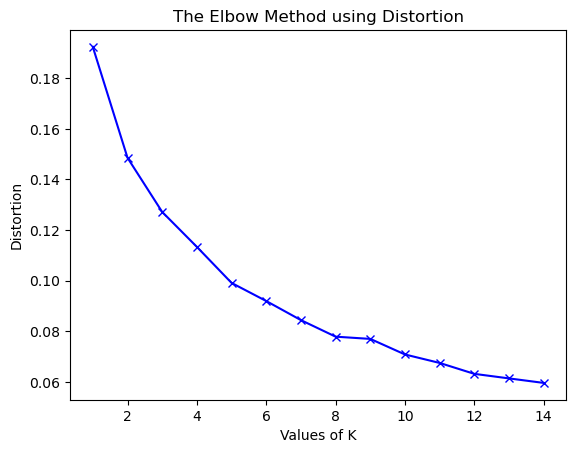

In [8]:
# Using Distortion -
# Tabulating the results -

for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 34.587783783122276
2 : 19.948311971400567
3 : 14.836481411646457
4 : 10.74758340784108
5 : 8.80824460134146
6 : 7.377041234040231
7 : 6.243463330663993
8 : 5.502937217009151
9 : 5.047242482147546
10 : 4.472425498634935
11 : 3.9841660043265987
12 : 3.5474683219208343
13 : 3.199611962345787
14 : 2.9674482611449893


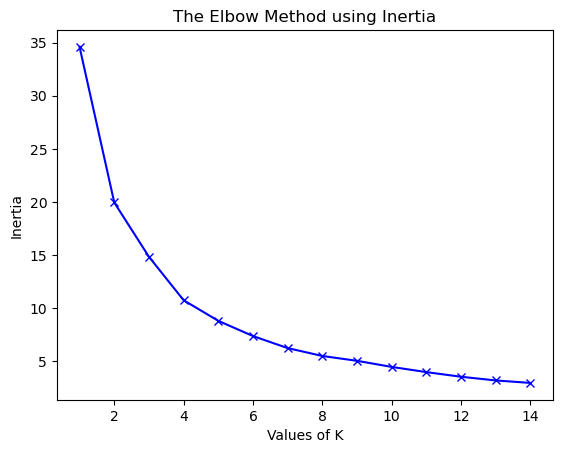

In [9]:
# Using Inertias -
# Tabulating the results -

for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

[[0.24820712 0.05666667]
 [0.10463862 0.29611385]
 [0.41655879 0.80952381]
 [0.10236067 0.11656442]
 [0.54953306 0.16326531]
 [0.26697512 0.20684524]
 [0.29306817 0.43394777]
 [0.10648656 0.49482402]]


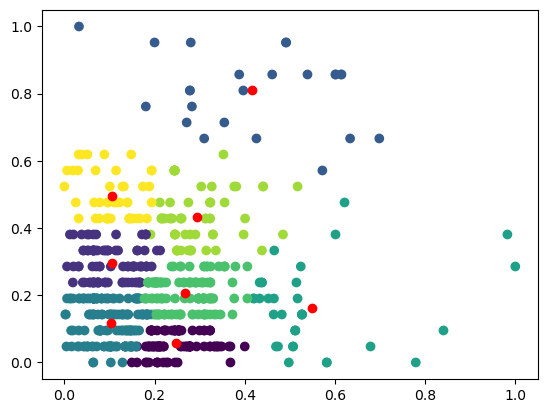

In [10]:
# From the visualisation using both method the optimum number of clusters is 8  
# Finding Centroids with 8 clusters -
data = pd.DataFrame(array, columns=('Sqft_scal', 'Floor_scal'))
data.head()

kmeans = KMeans(n_clusters=8).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data['Sqft_scal'], data['Floor_scal'], c= kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

In [11]:
print(centroids)

[[0.24820712 0.05666667]
 [0.10463862 0.29611385]
 [0.41655879 0.80952381]
 [0.10236067 0.11656442]
 [0.54953306 0.16326531]
 [0.26697512 0.20684524]
 [0.29306817 0.43394777]
 [0.10648656 0.49482402]]


In [12]:
print(kmeans.labels_)

[3 5 3 0 7 7 5 3 7 3 3 3 1 3 6 4 3 3 4 3 2 4 1 5 2 6 2 2 3 1 6 7 6 1 3 3 3
 3 2 1 2 7 3 0 5 5 0 0 2 3 5 0 3 3 4 0 3 7 3 0 1 3 5 3 3 3 3 3 1 1 1 1 0 3
 3 0 5 5 5 3 5 1 1 3 3 0 4 5 0 5 5 5 0 5 5 5 5 0 6 5 0 0 4 4 4 0 6 1 5 5 5
 1 0 6 1 5 4 1 7 3 7 7 0 5 6 1 1 5 1 1 5 0 2 1 5 5 1 0 0 7 2 1 1 3 3 7 5 4
 1 0 6 5 0 7 7 3 7 0 1 0 0 7 3 4 3 6 0 5 5 7 5 6 5 6 3 2 0 0 0 5 5 3 4 3 3
 5 3 3 3 0 3 3 6 6 0 6 6 7 3 0 7 6 0 3 5 0 7 3 1 0 7 3 5 3 3 0 5 6 3 6 1 6
 4 7 5 1 3 3 5 6 0 5 5 0 5 3 5 5 1 0 1 6 4 2 6 3 4 7 4 5 5 6 6 6 5 3 3 0 4
 0 7 1 0 5 3 3 1 3 3 1 3 5 1 1 3 5 3 5 5 3 7 5 5 7 0 6 2 6 7 5 0 1 6 3 5 6
 4 4 2 4 0 6 5 5 6 0 5 5 3 3 5 0 0 0 5 6 5 5 6 5 1 7 4 5 7 0 5 2 3 7 0 0 3
 4 5 3 0 1 3 0 1 3 6 0 3 3 1 0 3 3 5 3 6 5 7 0 5 0 5 0 0 0 3 1 3 2 5 6 1 3
 3 1 1 5 5 3 1 0 3 5 6 0 5 1 0 5 0 1 5 3 3 4 5 7 7 6 5 3 5 3 3 0 5 3 3 3 3
 1 3 1 3 3 3 0 1 1 5 6 3 1 7 0 3 2 0 5 5 4 3 3 2 2 3 3 4 4 1 3 0 0 3 0 5 7
 4 6 5 0 0 3 3 3 3 0 1 0 5 6 5 1 5 1 0 5 3 5 3 6 1 2 0 0 6 3 5 6 3 0 1 5 0
 5 6 3 5 3 1 3 6 3 1 0 4 

In [13]:
cluster_df=pd.DataFrame(kmeans.labels_)

In [14]:
cluster_df.rename(columns={0:'cluster'},inplace=True)

In [15]:
# Storing cluster to which the house belongs along with the data
rent_df=pd.concat([rent_df,cluster_df['cluster']],axis ='columns')

In [16]:
rent_df.head(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Sqft_scal,Floor_scal,cluster
0,1,1177.698,2,7,2,2,2,62000,0.148867,0.047619,3
1,2,2134.800,5,7,4,2,2,78000,0.322977,0.190476,5
2,3,1138.560,5,7,2,2,1,58000,0.141748,0.190476,3
3,4,1458.780,2,7,3,2,2,45000,0.200000,0.047619,0
4,5,967.776,11,14,3,2,2,45000,0.110680,0.476190,7


In [17]:
rent_df['cluster'].value_counts()

3    163
5    128
0    100
1     87
6     62
7     46
4     35
2     24
Name: cluster, dtype: int64